In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import requests
from datetime import datetime

### Energy Consumption and Generation by Site

In [ ]:
### Eenergy consumption
response = requests.get("http://127.0.0.1:5000/fetchall")
data = response.json()
df = pd.DataFrame(data)

df["energy_consumed_kwh"] = df["energy_consumed_kwh"].astype(float)
df["energy_generated_kwh"] = df["energy_generated_kwh"].astype(float)
df["net_energy_kwh"] = df["net_energy_kwh"].astype(float)

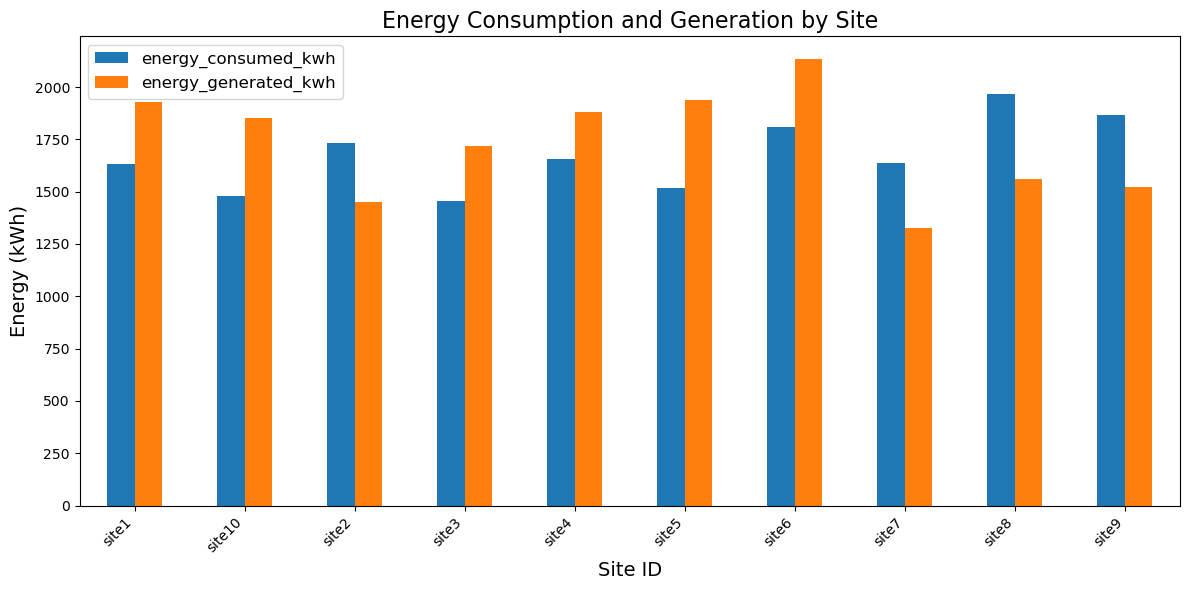

In [4]:
# Plot the data
ax = (
    df.groupby("site_id")[["energy_consumed_kwh", "energy_generated_kwh"]]
    .sum()
    .plot(kind="bar", figsize=(12, 6))
)

# Customize the plot
ax.set_title("Energy Consumption and Generation by Site", fontsize=16)
ax.set_xlabel("Site ID", fontsize=14)
ax.set_ylabel("Energy (kWh)", fontsize=14)
ax.legend(fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

### Distrubution of anomalies across sites

In [5]:
# Request data for site_id=site1
anomalies_count = {}
for site in [
    "site1",
    "site2",
    "site3",
    "site4",
    "site5",
    "site6",
    "site7",
    "site8",
    "site9",
    "site10",
]:
    response_site = requests.get(f"http://127.0.0.1:5000/fetchanomalies?site_id={site}")
    data_site = response_site.json()
    anomalies_count[site] = len(data_site)

anomalies_distribution = pd.Series(anomalies_count)

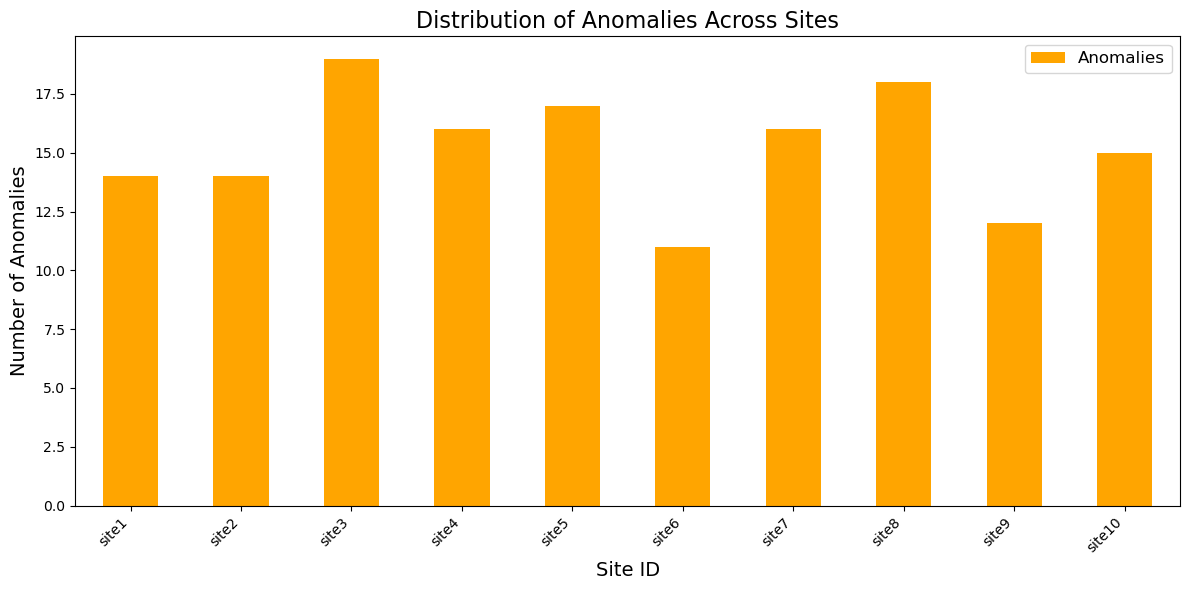

In [6]:
# Plot the data
ax = anomalies_distribution.plot(kind="bar", figsize=(12, 6), color="orange")
# Customize the plot
ax.set_title("Distribution of Anomalies Across Sites", fontsize=16)
ax.set_xlabel("Site ID", fontsize=14)
ax.set_ylabel("Number of Anomalies", fontsize=14)
ax.legend(["Anomalies"], fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

## Energy Trends over time

In [7]:
# Used the df fetched in first query

df["timestamp"] = pd.to_datetime(df["timestamp"])

# visualizing the trends by aggregating all the sites
df_clean = df[df["anomaly"] != True]
df_agg = df_clean.groupby("timestamp")[
    ["energy_consumed_kwh", "energy_generated_kwh", "net_energy_kwh"]
].sum()

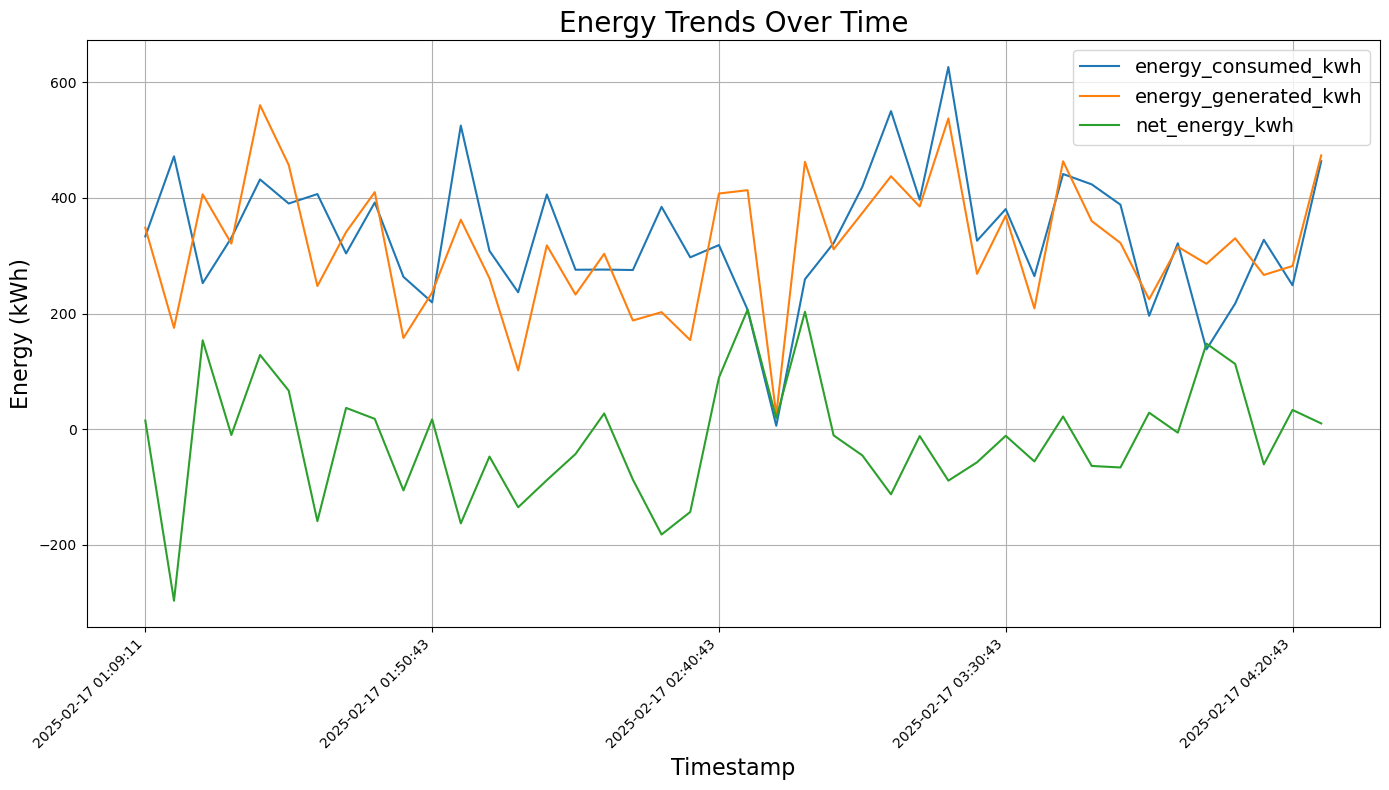

In [8]:
# Plot the data
fig, ax = plt.subplots(figsize=(14, 8))

df_agg.index = df_agg.index.strftime("%Y-%m-%d %H:%M:%S")
df_agg.plot(ax=ax)

ax.set_title("Energy Trends Over Time", fontsize=20)
ax.set_xlabel("Timestamp", fontsize=16)
ax.set_ylabel("Energy (kWh)", fontsize=16)
ax.legend(fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.grid(True)
plt.tight_layout()

plt.show()